In [1]:
import pandas as pd
pd.set_option('display.max_columns', 200)
from app.evaluation import complete_columns, drop_text_features, get_accuracy_and_plot_confusion
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.DataFrame.from_csv("data/processed_data.csv")
val_df = pd.DataFrame.from_csv("data/validation_data.csv")
y_train = df.pop("label")
y_val = val_df.pop("label")

df.fillna(0, inplace=True)
val_df.fillna(0, inplace=True)

df, val_df = complete_columns(df, val_df)

df = drop_text_features(df)
val_df = drop_text_features(val_df)

/home/madness/Documents/Projects/git_better/venv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(y_train) 

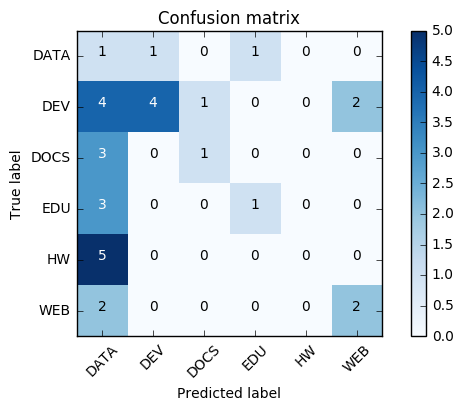

0.290322580645


In [3]:
# Train classifier
clf = XGBClassifier()
clf.fit(df.values, y_train)
y_valid_pred = clf.predict(val_df.values)

print get_accuracy_and_plot_confusion(y_val, y_valid_pred, le.classes_)